In [153]:
import numpy as np
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt
import iminuit
import scipy.stats as stats
from IPython.display import display, Math, Latex
from scipy.integrate import quad
from scipy.stats import rv_continuous
from iminuit import Minuit, cost
from scipy import stats
from scipy.optimize import curve_fit, root_scalar
import pandas as pd

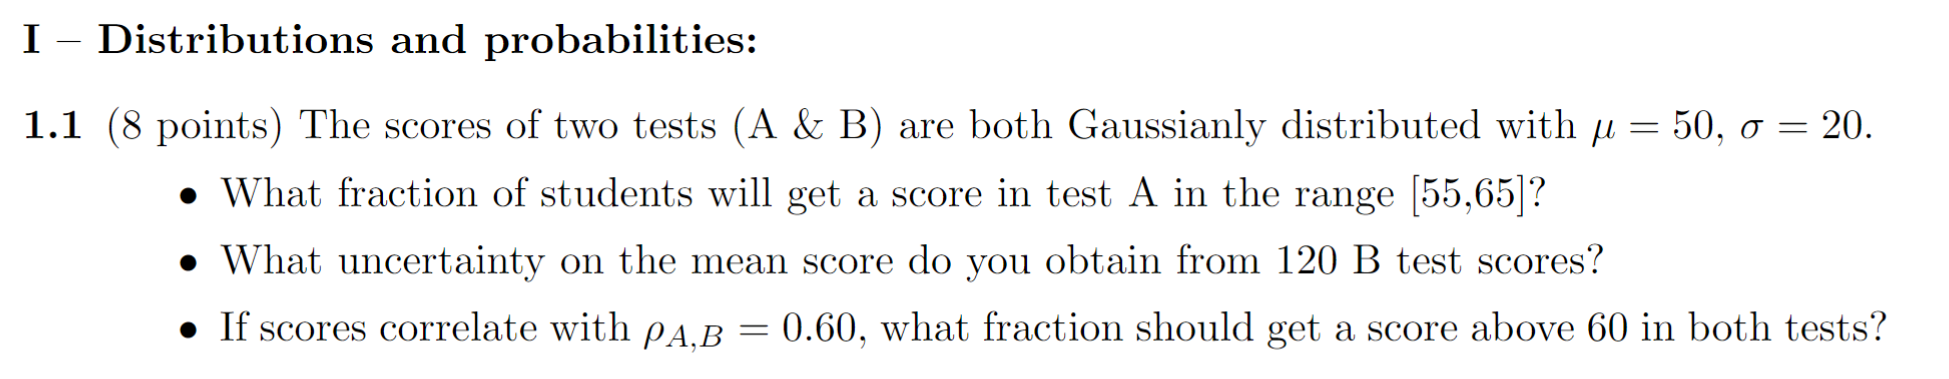

In [154]:
#Two gaussian distributions with mean 50 and sigma 20
gauss_A = stats.norm(50, 20)
gauss_B = stats.norm(50, 20)

#What fraction of students will get a score in test A in the range 55-65?
p_A = gauss_A.cdf(65) - gauss_A.cdf(55)
print(f"The probability of a student getting a score in test A in the range 55-65 is {p_A:.3f}")

#What uncertainty on the mean score do you obtain from 120 B test scores?
n_B = 120
mean_B = gauss_B.mean()
std_B = gauss_B.std()
uncertainty_B = std_B/np.sqrt(n_B)
print(f"The uncertainty on the mean score from 120 B test scores is {uncertainty_B:.3f}")

#If scores correlate, with rho_A,B = 0.6, what fraction should get a score above 60 in both tests?
rho_A_B = 0.6
mu_A = mu_B = 50
std_A = 20
std_B = 20
cov_A_B = [[std_A**2, rho_A_B*std_A*std_B], [rho_A_B*std_A*std_B, std_B**2]]
#Sample a lot of scores
N = 10000
scores = np.random.multivariate_normal([mu_A, mu_B], cov_A_B, N)
#Count how many scores are above 60 in both tests
n_both = np.sum((scores[:,0] > 60) & (scores[:,1] > 60))
p_both = n_both/N
print(f"The fraction of students getting a score above 60 in both tests is {p_both:.3f}")


The probability of a student getting a score in test A in the range 55-65 is 0.175
The uncertainty on the mean score from 120 B test scores is 1.826
The fraction of students getting a score above 60 in both tests is 0.182


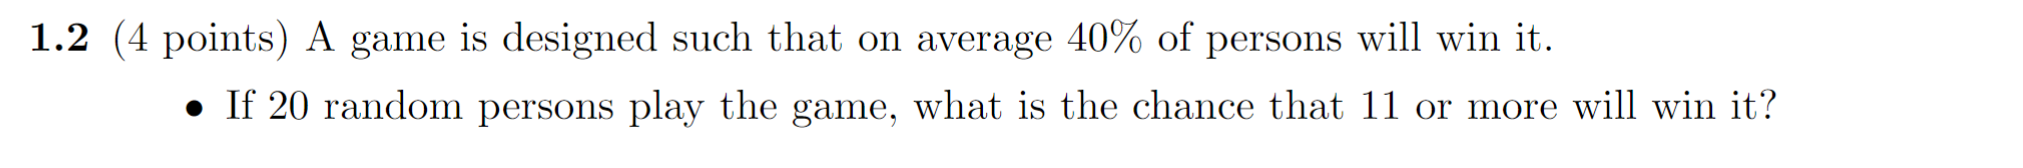

In [155]:
#A game is designed such that on average 40& of players win. If 20 random persons play the game, what is the probability that at least 11 win?
p = 0.4
n = 20
k = 11
p_11_win = stats.binom.sf(k-1, n, p)
print(f"The probability that at least 11 out of 20 random persons win the game is {p_11_win:.3f}")

The probability that at least 11 out of 20 random persons win the game is 0.128


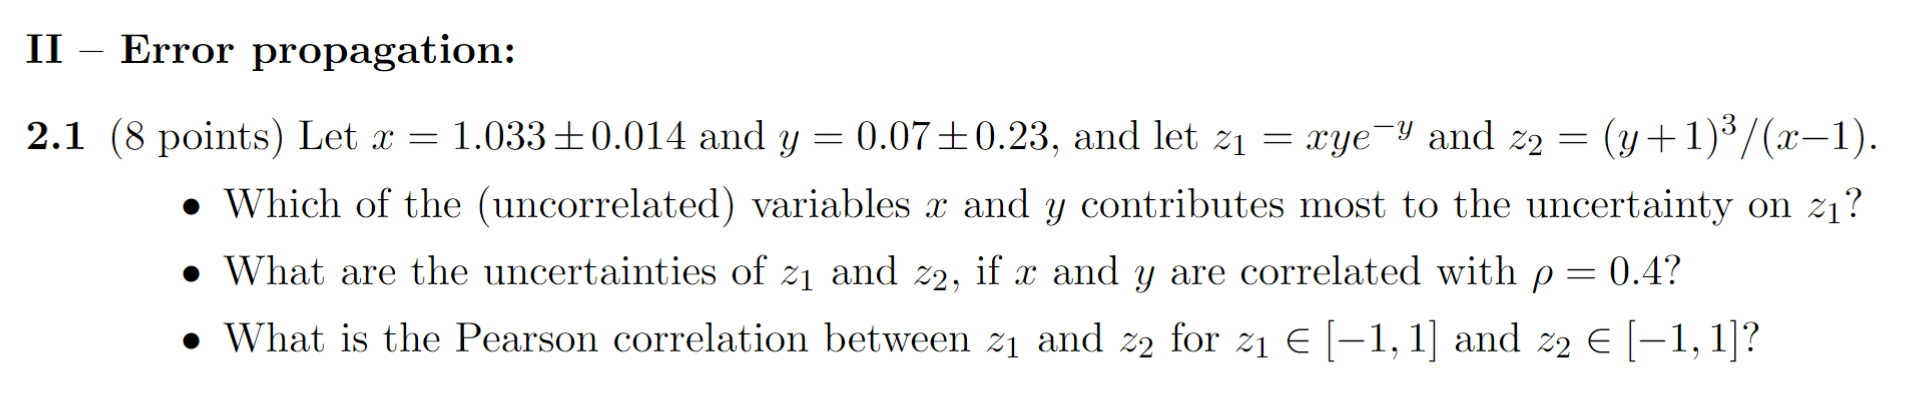

In [156]:
# Let x = 1.033 ± 0.014 and y = 0.07 ± 0.23, and let z1 = xye^−y and z2 = (y + 1)^3/(x−1).
x = 1.033
y = 0.07
x_err = 0.014
y_err = 0.23

#Which of the (uncorrelated) variables x and y contributes most to the uncertainty on z1?
z1 = x*y*np.exp(-y)
z1_x = y*np.exp(-y)
z1_y = x*np.exp(-y) - x*y*np.exp(-y)
uncertainty_z1_x = z1_x*x_err
uncertainty_z1_y = z1_y*y_err
print(f"The uncertainty on z1 due to x is {uncertainty_z1_x:.3f} and due to y is {uncertainty_z1_y:.3f}")

#What are the uncertainties of z1 and z2, if x and y are correlated with ρ = 0.4?
rho =0.4
cov_x_y = [[x_err**2, rho*x_err*y_err], [rho*x_err*y_err, y_err**2]]
z1_x = y*np.exp(-y)
z1_y = x*np.exp(-y) - x*y*np.exp(-y)
z2_x = -(y+1)**3/(x-1)**2
z2_y = 3*(y+1)**2/(x-1)
uncertainty_z1 = np.sqrt(z1_x**2*x_err**2 + z1_y**2*y_err**2 + 2*z1_x*z1_y*cov_x_y[0][1])
uncertainty_z2 = np.sqrt(z2_x**2*x_err**2 + z2_y**2*y_err**2 + 2*z2_x*z2_y*cov_x_y[0][1])
print(f"The uncertainty on z1 is {uncertainty_z1:.3f} and on z2 is {uncertainty_z2:.3f}")




The uncertainty on z1 due to x is 0.001 and due to y is 0.206
The uncertainty on z1 is 0.206 and on z2 is 22.792


Number of tries: 39043 and number of accepted points: 2000
The pearson correlation between z1 and z2 is 0.350


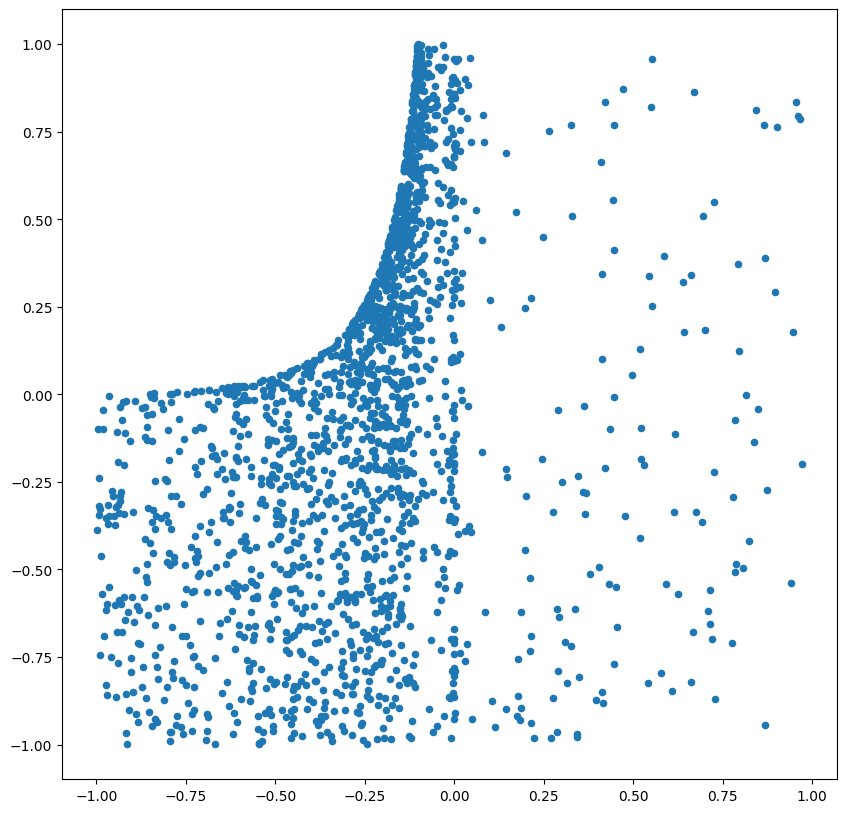

In [157]:
#What is the pearson correlation between z1 and z2 for z1 within [-1,1] and same for z2
def z1(x,y):
    return x*y*np.exp(-y)

def z2(x,y):
    return (y+1)**3/(x-1)


N = 2000
n = 0
n_tries = 0

Z_corr = np.zeros((2,N))
while n < N:
    x = np.random.normal(-3, 3, 1)[0]
    y = np.random.normal(-3, 3, 1)[0]
    if z1(x,y) > -1 and z1(x,y) < 1 and z2(x,y) > -1 and z2(x,y) < 1:
        Z_corr[0,n] = z1(x,y)
        Z_corr[1,n] = z2(x,y)
        n += 1
    n_tries += 1

print(f"Number of tries: {n_tries} and number of accepted points: {n}")

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Z_corr[1,:], Z_corr[0,:], s=20)

def pearson_corr(data1,data2):
    sig1 = np.std(data1)
    sig2 = np.std(data2)
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    cov = 1/len(data1)*np.sum((data1 - mean1)*(data2 - mean2))
    return cov/(sig1*sig2)

corr = pearson_corr(Z_corr[0,:], Z_corr[1,:])
print(f"The pearson correlation between z1 and z2 is {corr:.3f}")






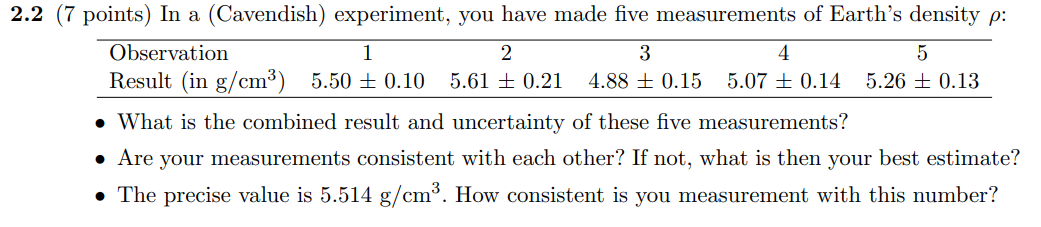

The weighted mean of the density is 5.276828225231647 with uncertainty 0.05606482349349807
The numpy weighted mean of the density is 5.279857142857143
From fitting using chi2 we get a mean of 5.276828225232966 with uncertainty 0.056064823494327634
chi2 = 16.707298322512663 
chi2/ndof = 4.177 
p = 0.002


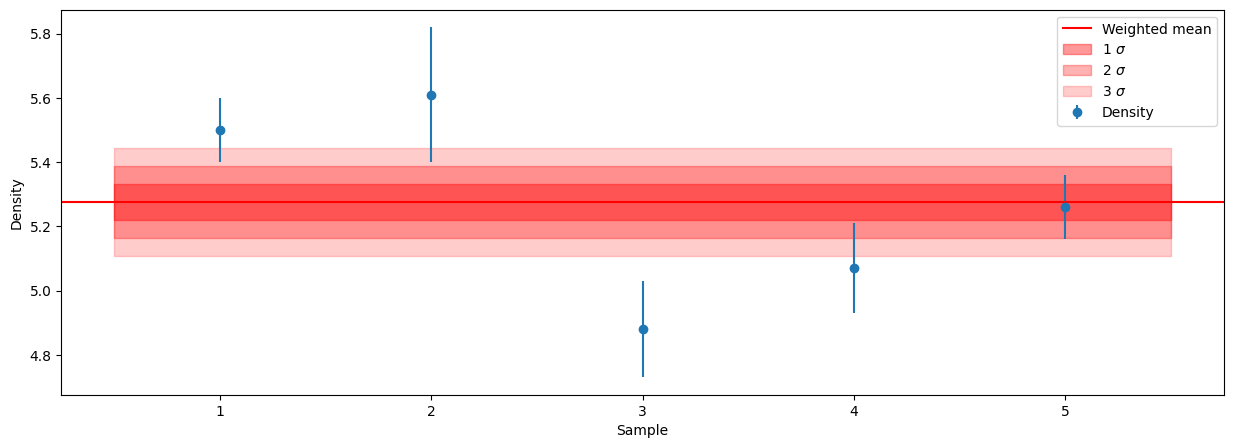

In [158]:
density = np.array([5.5,5.61,4.88,5.07,5.26])
density_error = np.array([0.10,0.21,0.15,0.14,0.1])

def weighted_mean(data, errors):
    weights = 1/errors**2
    mean = np.sum(weights*data)/np.sum(weights)
    uncertainty = 1/np.sqrt(np.sum(weights))
    return mean, uncertainty


#Trying to fit it to chi2 to a mean value
def mean_value(x, mean):
    return np.ones_like(x)*mean

chi2_fit = cost.LeastSquares(np.ones_like(density), density,density_error, mean_value)
minuit = Minuit(chi2_fit, mean=np.mean(density))
minuit.migrad()

chi2 = minuit.fval
ndof = len(density)-1
p = stats.chi2.sf(chi2, ndof)


mean, uncertainty = weighted_mean(density, density_error)
#Using numpy
mean_num = np.average(density, weights=density_error)

print(f"The weighted mean of the density is {mean} with uncertainty {uncertainty}")
print(f"The numpy weighted mean of the density is {mean_num}")
print(f'From fitting using chi2 we get a mean of {minuit.values["mean"]} with uncertainty {minuit.errors["mean"]}')
print(f'chi2 = {chi2} \nchi2/ndof = {chi2/ndof:.3f} \np = {p:.3f}')

fig, ax = plt.subplots(figsize=(15,5))
ax.errorbar(np.arange(len(density))+1, density, yerr=density_error, fmt='o', label='Density')
#Setting sigmas
ax.axhline(mean, color='r', label='Weighted mean')
ax.fill_between([0.5,5.5], mean-uncertainty, mean+uncertainty, color='r', alpha=0.4, label =r'1 $\sigma$')
ax.fill_between([0.5,5.5], mean-2*uncertainty, mean+2*uncertainty, color='r', alpha=0.3, label =r'2 $\sigma$')
ax.fill_between([0.5,5.5], mean-3*uncertainty, mean+3*uncertainty, color='r', alpha=0.2, label =r'3 $\sigma$')
ax.set_xlabel('Sample')
ax.set_ylabel('Density')
ax.legend()


From this I discard the 3 point and revaluate my chi2 and p value

In [159]:
density = np.array([5.5,5.61,5.07,5.26])
density_error = np.array([0.10,0.21,0.14,0.1])

mean2, uncertainty2 = weighted_mean(density, density_error)
#Using numpy
mean_num = np.average(density, weights=density_error)


fit2 = cost.LeastSquares(np.ones_like(density), density,density_error, mean_value)
minuit2 = Minuit(fit2, mean=np.mean(density))
minuit2.migrad()

chi2 = minuit2.fval
ndof = len(density)-1
p = stats.chi2.sf(chi2, ndof)

print(f"The numpy weighted mean of the density is {mean_num}")
print(f'The weighted mean of the density is {mean2} with uncertainty {uncertainty2}')
print(f'From fitting using chi2 we get a mean of {minuit2.values["mean"]} with uncertainty {minuit2.errors["mean"]}')

print(f'chi2 = {chi2} \nchi2/ndof = {chi2/ndof:.3f} \np = {p:.3f}')

The numpy weighted mean of the density is 5.38890909090909
The weighted mean of the density is 5.341267605633803 with uncertainty 0.0604457345628574
From fitting using chi2 we get a mean of 5.341267605625889 with uncertainty 0.06044573456111148
chi2 = 8.572009198045414 
chi2/ndof = 2.857 
p = 0.036


In [160]:
#The precise value is 5.514 g/cm3. How consistent is you measurement with this number?
true_value = 5.514
t2 = np.abs(mean2-true_value)/uncertainty2
t2_num = np.abs(mean-true_value)/uncertainty
p1 = 2*stats.t.sf(t2, len(density)-1) #two sided, as we are interested in both if it's higher or lower
p2 = 2*stats.t.sf(t2_num, len(density)-1) #two sided, as we are interested in both if it's higher or lower
print(f"The t-value after removing 1 points for the weighted mean is {t2:.3f} and the p-value is {p1:.3f}")
print(f"The t-value before the weighted mean is {t2_num:.3f} and the p-value is {p2:.3f}")

The t-value after removing 1 points for the weighted mean is 2.858 and the p-value is 0.065
The t-value before the weighted mean is 4.230 and the p-value is 0.024


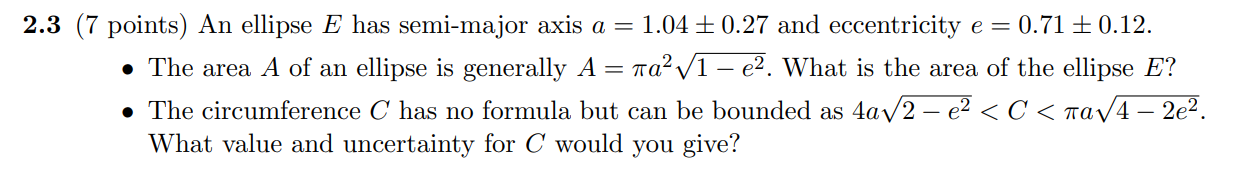

In [161]:
#An ellipse E has semi-major axis a = 1.04 ± 0.27 and eccentricity e = 0.71 ± 0.12.

#The area A of an ellipse is generally A = πa^2*√(1−e^2). What is the area of the ellipse E?
a = 1.04
a_err = 0.27
e = 0.71
e_err = 0.12
A = np.pi*a**2*np.sqrt(1-e**2)
uncertainty_A = np.sqrt((2*np.pi*a*np.sqrt(1-e**2)*a_err)**2 + (np.pi*a**2*e/(np.sqrt(-e**2+1))*e_err)**2)

print(f"The area of the ellipse is {A:.3f} with uncertainty {uncertainty_A:.3f}")



The area of the ellipse is 2.393 with uncertainty 1.309


- The circumference C has no formula but can be bounded as $4a\sqrt{2 − e^2} < C < \pi a\sqrt{4 − 2e^2}$.
What value and uncertainty for C would you give?

First we compute the two bounds, and their associated errors using error propagation. we get this to the interval:
$$C \in [5.06 \pm 1.35 : 5.65 \pm 1.21]$$
One thing worth to notice is that the errors on the two bound lie within one another, aswells as the error on both bounds are larger than the interval without errors. 

Again we want to check if the errorpropagation holds. Using the same values,and the same methods as before we end up with the histogram shown below. Here both distributions look gaussian, and when fitted we get great p values. Examining the fitted mean and standard deviations, we observe that they are consistent with the results found using the analytical approach. 
Looking at the two histograms it is also easy to spot that the errors are larger than the difference between the two peaks.

In [162]:
#The circumference C has no formula but can be bounded as 4*a*√(2− e^2) < C < πa√(4−2*e^2). What value and uncertainty for C would you give?

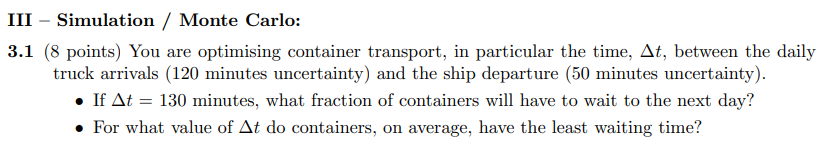

The fraction of containers that will have to wait to the next day is 0.159


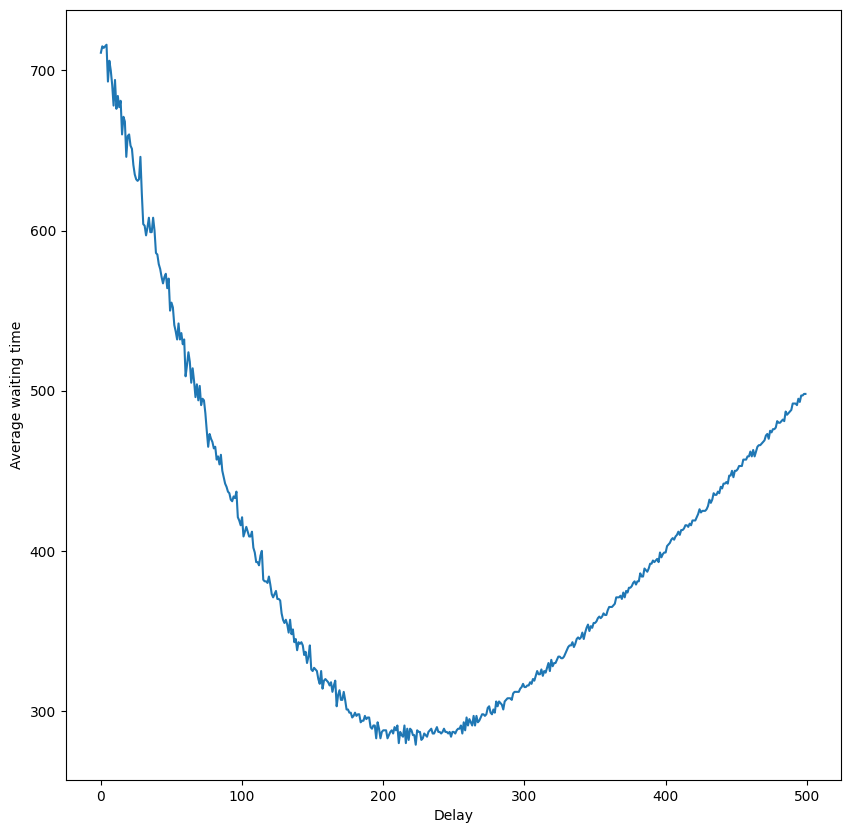

In [163]:
#You are optimising container transport, in particular the time, ∆t, between the daily truck arrivals (120 minutes uncertainty) and the ship departure (50 minutes uncertainty). If ∆t = 130 minutes, what fraction of containers will have to wait to the next day?
delta_t = 130
delta_t_err = np.sqrt(120**2 + 50**2)
p = stats.norm.sf(delta_t, loc=0, scale=delta_t_err)
print(f"The fraction of containers that will have to wait to the next day is {p:.3f}")

#For what value of ∆t do containers, on average, have the least waiting time?

delay = np.arange(0, 500, 1)
frac = np.zeros_like(delay)
wait = np.zeros_like(delay)

for i, d in enumerate(delay):
    gauss = np.random.normal(-d, delta_t_err, 10000)
    gauss[gauss > 0] -= 24*60
    frac[i] = stats.norm.sf(0, loc=-d, scale=delta_t_err)
    wait[i] = -np.mean(gauss)


fig, ax = plt.subplots(figsize=(10,10))
ax.plot(delay, wait)
ax.set_xlabel('Delay')
ax.set_ylabel('Average waiting time')
plt.show()

# gauss = np.random.normal(130, delta_t_err, 10000)
# x = np.linspace(-1000, 1000, 1000)

# fig, ax = plt.subplots(figsize=(10,10))
# ax.hist(gauss, bins=100, density=True)
# ax.plot(x, stats.norm.pdf(x, 130, delta_t_err), label='Normal distribution')
# ax.set_xlabel('Time')




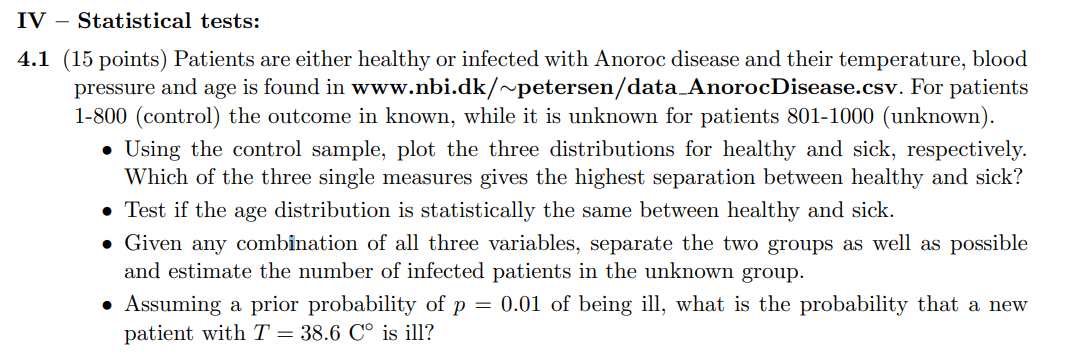

In [164]:
#Loading data
Anroc = pd.read_csv('data_AnrocDisease.txt')
Patient_ID_control = Anroc['PatientID'][:800]
Patient_ID_unknwon = Anroc['PatientID'][801:]
Temp_control = Anroc['  Temp'][:800]
Temp_unknown = Anroc['  Temp'][801:]
BloodP_control = Anroc['   BloodP'][:800]
BloodP_unknown = Anroc['   BloodP'][801:]
age_control = Anroc['   Age'][:800]
age_unknown = Anroc['   Age'][801:]
Status_control = Anroc['      Status (0: Healthy; 1: Ill; -1: Unknown)'][:800]
Status_unknown = Anroc['      Status (0: Healthy; 1: Ill; -1: Unknown)'][801:]

mask_healthy = Status_control == 0
mask_ill = Status_control == 1



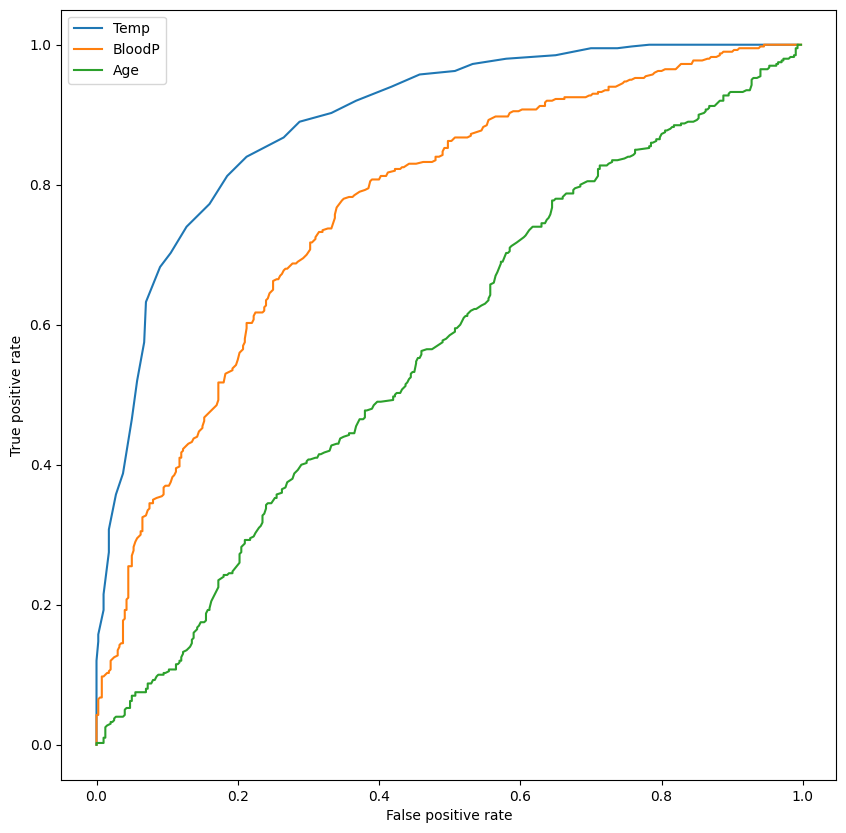

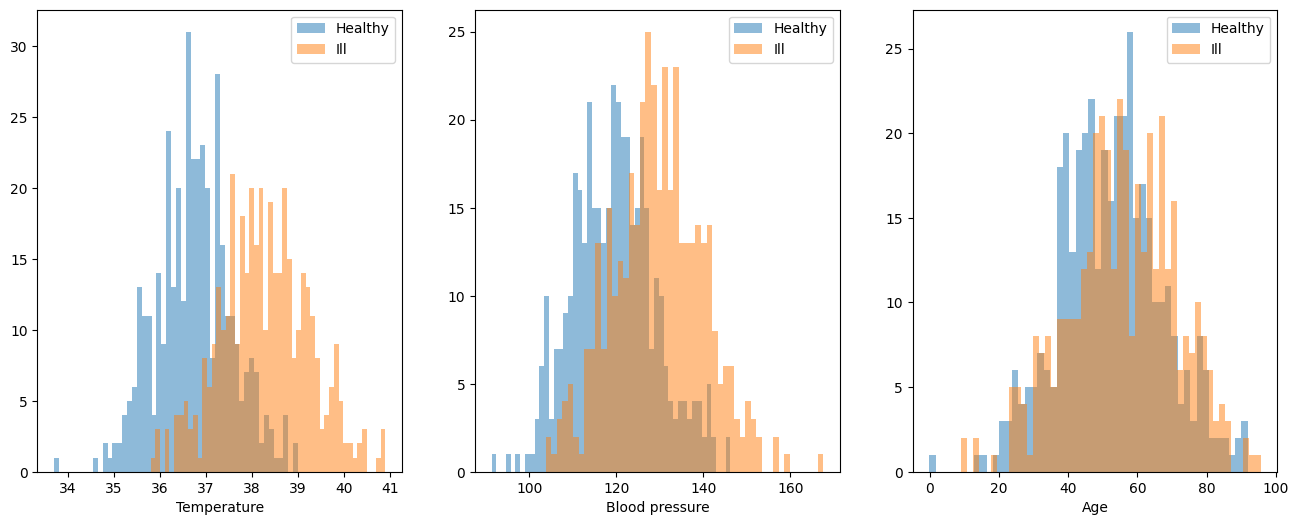

In [176]:
def ROC_curve(data_A, data_B, n_points):
    
    thresholds = np.linspace(min(min(data_A), min(data_B)), max(max(data_A), max(data_B)), n_points)
    
    TPR = []
    FPR = []
    i = 0
    for t in thresholds:
        TPR.append(np.sum(data_A < t) / len(data_A))
        FPR.append(np.sum(data_B < t) / len(data_B))

        # if i != 0 and TPR[i] <= pos_rate and TPR[i-1] >= pos_rate:
        #     cut = t
        # i += 1
    # for i in range(len(TPR)):
    #     if TPR[i] >= pos_rate and TPR[i-1] <= pos_rate:
    #         cut = TPR[i]
    #         break
    
        
    return TPR, FPR

TPR, FPR = ROC_curve(Temp_control[mask_healthy], Temp_control[mask_ill], len(Temp_control))
TPR2, FPR2 = ROC_curve(BloodP_control[mask_healthy], BloodP_control[mask_ill], len(BloodP_control))
TPR3, FPR3 = ROC_curve(age_control[mask_healthy], age_control[mask_ill], len(age_control))

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(FPR, TPR, label='Temp')
ax.plot(FPR2, TPR2, label='BloodP')
ax.plot(FPR3, TPR3, label='Age')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.legend()

fig, ax = plt.subplots(1,3, figsize=(16,6))

ax[0].hist(Temp_control[mask_healthy], bins=50, alpha=0.5, label='Healthy')
ax[0].hist(Temp_control[mask_ill], bins=50, alpha=0.5, label='Ill')
ax[0].set_xlabel('Temperature')
ax[0].legend()

ax[1].hist(BloodP_control[mask_healthy], bins=50, alpha=0.5, label='Healthy')
ax[1].hist(BloodP_control[mask_ill], bins=50, alpha=0.5, label='Ill')
ax[1].set_xlabel('Blood pressure')
ax[1].legend()

ax[2].hist(age_control[mask_healthy], bins=50, alpha=0.5, label='Healthy')
ax[2].hist(age_control[mask_ill], bins=50, alpha=0.5, label='Ill')
ax[2].set_xlabel('Age')
ax[2].legend()

plt.show()

